# Harjeet Singh

In [ ]:
#DECISION TREE, RANDOM FOREST, KNN, ADA BOOST AND NAIVE BAYSE ALL TOGETHER
def(df):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.metrics import accuracy_score, confusion_matrix
    from sklearn.naive_bayes import GaussianNB



    l=[]
    l1=[]
    l2=[]
    model_1aa=DecisionTreeClassifier(random_state=100,max_depth=4)
    model_2aa=RandomForestClassifier(random_state=100,n_estimators=300)
    model_3aa=KNeighborsClassifier(n_neighbors=5)
    model_4aa=AdaBoostClassifier(random_state=100, n_estimators=300)
    model_5aa=GaussianNB()
    a=(model_1aa,model_2aa,model_3aa,model_4aa,model_5aa)
    for i in a:
        i.fit(train_x,train_y)
        pred_test=i.predict(test_x)
        a=accuracy_score(test_y,pred_test)
        l.append(a*100)
        pred_probs = pd.DataFrame(i.predict_proba(test_x),columns=['Neg', 'Pos'])
        pred_test = pred_probs['Pos'].apply(lambda v: 1 if v>0.5 else 0)
        tn, fp, fn, tp = confusion_matrix(test_y, pred_test).ravel()
        sensitivity = tp/ (tp+fn)
        specificity = tn / (tn+fp)
        l1.append(sensitivity*100)
        l2.append(specificity*100)

    df=(pd.DataFrame({'Accuracy':l,'Sensitivity':l1,'Specificity':l2},index=['Decision Tree','Random Forest','KNN','Ada Boost','Naive Bayes']).sort_values('Accuracy',ascending=False))
    df

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [2]:
credit=pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/credit-default.csv')
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [ ]:
import 

In [ ]:
c = pd.get_dummies(credit.drop('default',axis = 1))# dropped the y
c['default'] = credit['default']

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(c,random_state=100,test_size=0.3)
print(train.shape)
print(test.shape)

In [ ]:
train_x=train.drop('default',axis=1)
train_y=train['default']

test_x=test.drop('default',axis=1)
test_y=test['default']


print(train_x.shape)
print(train_y.shape)

print(test_x.shape)
print(test_y.shape)

# ACCURACY OF DATASET USING DECISION TREE, RANDOM FOREST, KNN, ADA BOOST AND NAIVE BAYSE ALL TOGETHER

In [120]:
#DECISION TREE, RANDOM FOREST, KNN, ADA BOOST AND NAIVE BAYSE ALL TOGETHER

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB


l=[]
model_1aa=DecisionTreeClassifier(random_state=100,max_depth=4)
model_2aa=RandomForestClassifier(random_state=100,n_estimators=300)
model_3aa=KNeighborsClassifier(n_neighbors=5)
model_4aa=AdaBoostClassifier(random_state=100, n_estimators=300)
model_5aa=GaussianNB()
a=(model_1aa,model_2aa,model_3aa,model_4aa,model_5aa)
for i in a:
    i.fit(train_x,train_y)
    pred_test=i.predict(test_x)
    a=accuracy_score(test_y,pred_test)
    l.append(a*100)
df=(pd.DataFrame({'Accuracy':l},index=['Decision Tree','Random Forest','KNN','Ada Boost','Naive Bayes']).sort_values('Accuracy',ascending=False))
df

,Accuracy
Random Forest,73.333333
Decision Tree,69.666667
Ada Boost,69.333333
Naive Bayes,68.333333
KNN,67.666667


# DECISION TREE

# GRID SEARCH FOR DECISION TREE

In [80]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': list(range(1,30))}
base_estimator = DecisionTreeClassifier(random_state=100)
cv_model = GridSearchCV(base_estimator,
                       param_grid=params,
                       cv=10)
cv_model.fit(train_x, train_y)
cv_model.best_params_

{'max_depth': 4}

In [81]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=100,max_depth=3)
model.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [82]:
pred_test=model.predict(test_x)
pred_results=pd.DataFrame({'actual':test_y,'predicted':pred_test})

In [117]:
#True Positive(TP)
tp_a1=pred_results[(pred_results.predicted==1) & (pred_results.actual==1)].shape[0]

#True Negative(TN)
tn_a1=pred_results[(pred_results.predicted==2) & (pred_results.actual==2)].shape[0]

#False Positive(FP)
fp_a1=pred_results[(pred_results.predicted==1) & (pred_results.actual==2)].shape[0]

#False Negative(FN)
fn_a1=pred_results[(pred_results.predicted==2) & (pred_results.actual==1)].shape[0]


tp_a1,tn_a1,fp_a1,fn_a1

(179, 32, 49, 40)

In [84]:
accu_a1=(tn_a1+tp_a1)/(tn_a1+tp_a1+fp_a1+fn_a1)
sensi_a1=tp_a1/(tp_a1+fn_a1)
speci_a1=tn_a1/(tn_a1+fp_a1)

accu_a1,sensi_a1,speci_a1

(0.7033333333333334, 0.817351598173516, 0.3950617283950617)

In [85]:
print('Accuracy :',accu_a1)
print('Sensitivity :',sensi_a1)

Accuracy : 0.7033333333333334
Sensitivity : 0.817351598173516


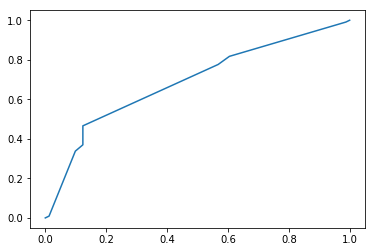

In [137]:
pred_probs_dt = pd.DataFrame(model.predict_proba(test_x),columns=['Pos','Neg'])
fp_dt, tp_dt, th_dt = roc_curve(test_y,pred_probs_dt['Pos'],pos_label=1)
plt.plot(fp_dt,tp_dt)
plt.show()

# RANDOM FOREST

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(random_state=100,n_estimators=300)
model_rf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [88]:
pred_results_rf = model_rf.predict(test_x)
pred_results_a2 = pd.DataFrame({'actual': test_y,'predicted': pred_results_rf})

In [89]:
#True Positive(TP)
tp_a2=pred_results_a2[(pred_results_a2.predicted==1) & (pred_results_a2.actual==1)].shape[0]
print(tp_a2)

#True Negative(TN)
tn_a2=pred_results_a2[(pred_results_a2.predicted==2) & (pred_results_a2.actual==2)].shape[0]
print(tn_a2)

#False Positive(FP)
fp_a2=pred_results_a2[(pred_results_a2.predicted==1) & (pred_results_a2.actual==2)].shape[0]
print(fp_a2)

#False Negative(FN)
fn_a2=pred_results_a2[(pred_results_a2.predicted==2) & (pred_results_a2.actual==1)].shape[0]
print(fn_a2)

193
27
54
26


In [90]:
accu_a2=(tn_a2+tp_a2)/(tn_a2+tp_a2+fp_a2+fn_a2)

sensi_a2=tp_a2/(tp_a2+fn_a2)

speci_a2=tn_a2/(tn_a2+fp_a2)
accu_a2,sensi_a2,speci_a2

(0.7333333333333333, 0.8812785388127854, 0.3333333333333333)

In [91]:
print('Accuracy :',accu_a2)
print('Sensitivity :',sensi_a2)


Accuracy : 0.7333333333333333
Sensitivity : 0.8812785388127854


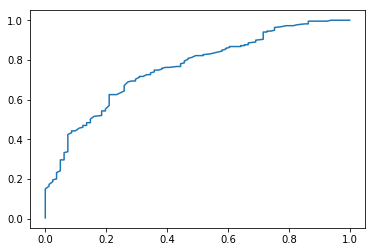

In [138]:
pred_probs_dt = pd.DataFrame(model_rf.predict_proba(test_x),columns=['Pos','Neg'])
fp_rf, tp_rf, th_rf = roc_curve(test_y,pred_probs_dt['Pos'],pos_label=1)
plt.plot(fp_rf,tp_rf)
plt.show()

# ADA BOOST

In [92]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
model3 = AdaBoostClassifier(random_state=100, n_estimators=800)
model3.fit(train_x, train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=800, random_state=100)

In [94]:
pred_results3 = model3.predict(test_x)
pred_results_a3 = pd.DataFrame({'actual': test_y,'predicted': pred_results3})

In [95]:
#True Positive(TP)
tp_a3=pred_results_a3[(pred_results_a3.predicted==2) & (pred_results_a3.actual==2)].shape[0]
print(tp_a3)

#True Negative(TN)
tn_a3=pred_results_a3[(pred_results_a3.predicted==1) & (pred_results_a3.actual==1)].shape[0]
print(tn_a3)

#False Positive(FP)
fp_a3=pred_results_a3[(pred_results_a3.predicted==2) & (pred_results_a3.actual==1)].shape[0]
print(fp_a3)

#False Negative(FN)
fn_a3=pred_results_a2[(pred_results_a3.predicted==1) & (pred_results_a3.actual==2)].shape[0]
print(fn_a3)

33
177
42
48


In [96]:
accu_a3=(tn_a3+tp_a3)/(tn_a3+tp_a3+fp_a3+fn_a3)

sensi_a3=tp_a3/(tp_a3+fn_a3)

speci_a3=tn_a3/(tn_a3+fp_a3)
accu_a3,sensi_a3,speci_a3

(0.7, 0.4074074074074074, 0.8082191780821918)

In [97]:
print('Accuracy :',accu_a3)
print('Sensitivity :',sensi_a3)


Accuracy : 0.7
Sensitivity : 0.4074074074074074


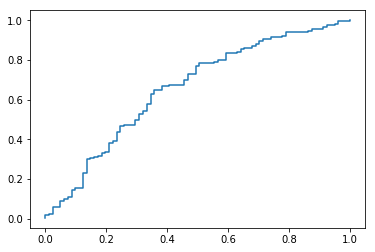

In [139]:
pred_probs_dt = pd.DataFrame(model3.predict_proba(test_x),columns=['Pos','Neg'])
fp_ab, tp_ab, th_ab = roc_curve(test_y,pred_probs_dt['Pos'],pos_label=1)
plt.plot(fp_ab,tp_ab)
plt.show()

# KNN CLASSIFICATION

In [98]:
from sklearn.neighbors import KNeighborsClassifier


In [99]:
model_a4=KNeighborsClassifier(n_neighbors=5)
model_a4.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [100]:
pred_a4=model_a4.predict(test_x)
df_a4=pd.DataFrame({'actual':test_y,'predicted':pred_a4})

In [101]:
#True Positive
tp_a4=df_a4[(df_a4.actual==2)&(df_a4.predicted==2)].shape[0]

#True Negaive
tn_a4=df_a4[(df_a4.actual==1)&(df_a4.predicted==1)].shape[0]

#False Positive
fp_a4=df_a4[(df_a4.actual==1)&(df_a4.predicted==2)].shape[0]

#False Negative
fn_a4=df_a4[(df_a4.actual==2)&(df_a4.predicted==1)].shape[0]

tp_a4,tn_a4,fp_a4,fn_a4

(19, 184, 35, 62)

In [102]:
accu_a4=(tn_a4+tp_a4)/(tn_a4+tp_a4+fp_a4+fn_a4)
sensi_a4=tp_a4/(tp_a4+fn_a4)
speci_a4=tn_a4/(tn_a4+fp_a4)

accu_a4,sensi_a4,speci_a4

(0.6766666666666666, 0.2345679012345679, 0.8401826484018264)

In [103]:
print('Accuracy :',accu_a4)
print('Sensitivity :',sensi_a4)


Accuracy : 0.6766666666666666
Sensitivity : 0.2345679012345679


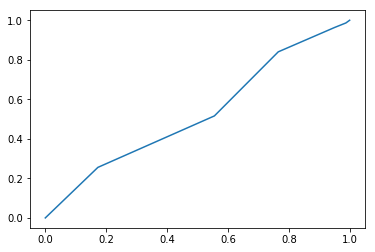

In [140]:
pred_probs_dt = pd.DataFrame(model_a4.predict_proba(test_x),columns=['Pos','Neg'])
fp_knn, tp_knn, th_knn = roc_curve(test_y,pred_probs_dt['Pos'],pos_label=1)
plt.plot(fp_knn,tp_knn)
plt.show()

# Naive Bayse

In [104]:
from sklearn.naive_bayes import GaussianNB
model_5=GaussianNB()
model_5.fit(train_x,train_y)

GaussianNB(priors=None)

In [105]:
pred_a5=model_5.predict(test_x)
df_a5=pd.DataFrame({'actual':test_y,'predicted':pred_a5})

In [106]:
#True Positive(TP)
tp_nb=df_a5[(df_a5.predicted==1) & (df_a5.actual==1)].shape[0]

#True Negative(TN)
tn_nb=df_a5[(df_a5.predicted==2) & (df_a5.actual==2)].shape[0]

#False Positive(FP)
fp_nb=df_a5[(df_a5.predicted==1) & (df_a5.actual==2)].shape[0]

#False Negative(FN)
fn_nb=df_a5[(df_a5.predicted==2) & (df_a5.actual==1)].shape[0]


tp_nb,tn_nb,fp_nb,fn_nb

(161, 44, 37, 58)

In [107]:
accu_nb=(tn_nb+tp_nb)/(tn_nb+tp_nb+fp_nb+fn_nb)
sensi_nb=tp_nb/(tp_nb+fn_nb)
speci_nb=tn_nb/(tn_nb+fp_nb)

In [108]:
print('Accuracy :',accu_nb)
print('Sensitivity :',sensi_nb)


Accuracy : 0.6833333333333333
Sensitivity : 0.7351598173515982


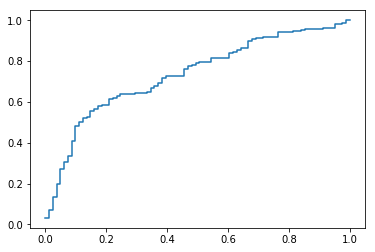

In [141]:
pred_probs_dt = pd.DataFrame(model_5.predict_proba(test_x),columns=['Pos','Neg'])
fp_nb, tp_nb, th_nb = roc_curve(test_y,pred_probs_dt['Pos'],pos_label=1)
plt.plot(fp_nb,tp_nb)
plt.show()

In [109]:
main_df = {'Decision Tree': pd.Series([tp_a1,tn_a1,fp_a1,fn_a1,accu_a1,sensi_a1,speci_a1],index=['TP','TN','FP','FN','Accuracy','Sensitivity','Specificity']),                                      
          'Random Forest': pd.Series([tp_a2,tn_a2,fp_a2,fn_a2,accu_a2,sensi_a2,speci_a2],index=['TP','TN','FP','FN','Accuracy','Sensitivity','Specificity']),                                     
          'Adaptive Boosting': pd.Series([tp_a3,tn_a3,fp_a3,fn_a3,accu_a3,sensi_a3,speci_a3],index=['TP','TN','FP','FN','Accuracy','Sensitivity','Specificity']),
          'KNN Classification': pd.Series([tp_a4,tn_a4,fp_a4,fn_a4,accu_a4,sensi_a4,speci_a4],index=['TP','TN','FP','FN','Accuracy','Sensitivity','Specificity']),
           'Naive Bayes': pd.Series([tp_nb,tn_nb,fp_nb,fn_nb,accu_nb,sensi_nb,speci_nb],index=['TP','TN','FP','FN','Accuracy','Sensitivity','Specificity'])
          }

In [110]:
info = pd.DataFrame(main_df)

info

,Adaptive Boosting,Decision Tree,KNN Classification,Naive Bayes,Random Forest
TP,33.000000,179.000000,19.000000,161.000000,193.000000
TN,177.000000,32.000000,184.000000,44.000000,27.000000
FP,42.000000,49.000000,35.000000,37.000000,54.000000
FN,48.000000,40.000000,62.000000,58.000000,26.000000
Accuracy,0.700000,0.703333,0.676667,0.683333,0.733333
Sensitivity,0.407407,0.817352,0.234568,0.735160,0.881279
Specificity,0.808219,0.395062,0.840183,0.543210,0.333333


In [142]:
from sklearn.metrics import auc

auc_dt= auc(fp_dt,tp_dt)

auc_rf = auc(fp_rf,tp_rf)

auc_ab = auc(fp_ab,tp_ab)

auc_knn = auc(fp_knn,tp_knn)

auc_nb = auc(fp_nb,tp_nb)

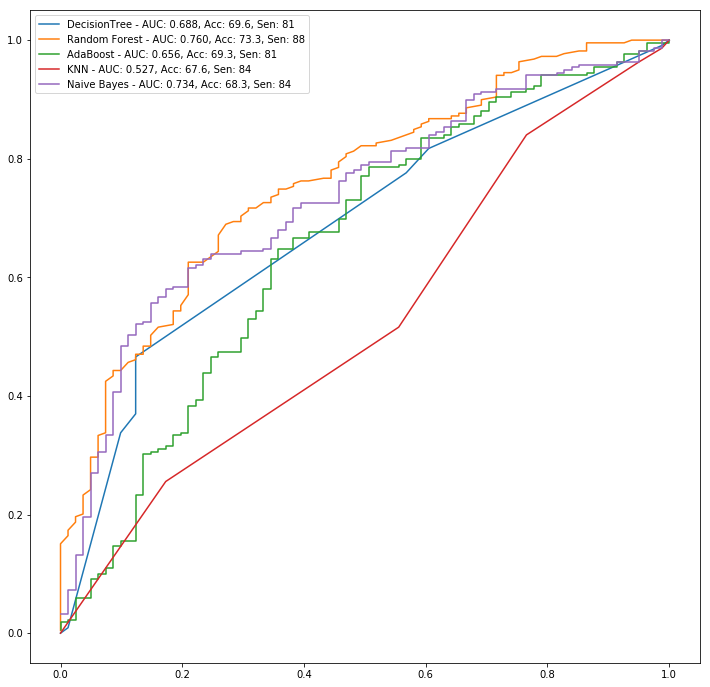

In [148]:
plt.figure(figsize=(12,12))
plt.plot(fp_dt,tp_dt)
plt.plot(fp_rf,tp_rf)
plt.plot(fp_ab,tp_ab)
plt.plot(fp_knn,tp_knn)
plt.plot(fp_nb,tp_nb)
plt.legend(['DecisionTree - AUC: %.3f, Acc: 69.6, Sen: 81' % auc_dt,

           'Random Forest - AUC: %.3f, Acc: 73.3, Sen: 88' % auc_rf,

           'AdaBoost - AUC: %.3f, Acc: 69.3, Sen: 81' % auc_ab,

           'KNN - AUC: %.3f, Acc: 67.6, Sen: 84' % auc_knn,

           'Naive Bayes - AUC: %.3f, Acc: 68.3, Sen: 84' % auc_nb])

# Random forest is having highest accuracy, higest sensitivity and lowest specificity